In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("train.csv").drop("Id", axis=1)

In [65]:
df.shape

(1460, 80)

In [50]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


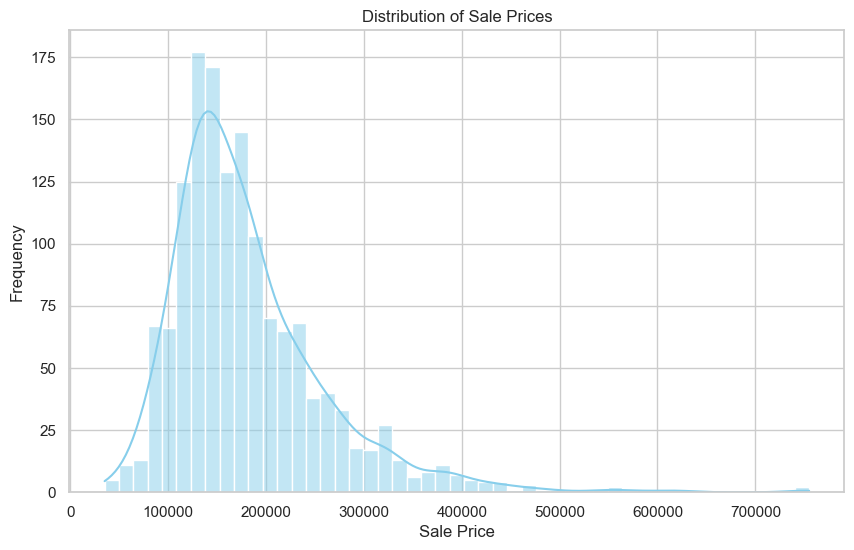

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, color="skyblue")
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [42]:
numeric_df = df.select_dtypes(include=[np.number])

In [52]:
numeric_df.shape

(1460, 37)

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

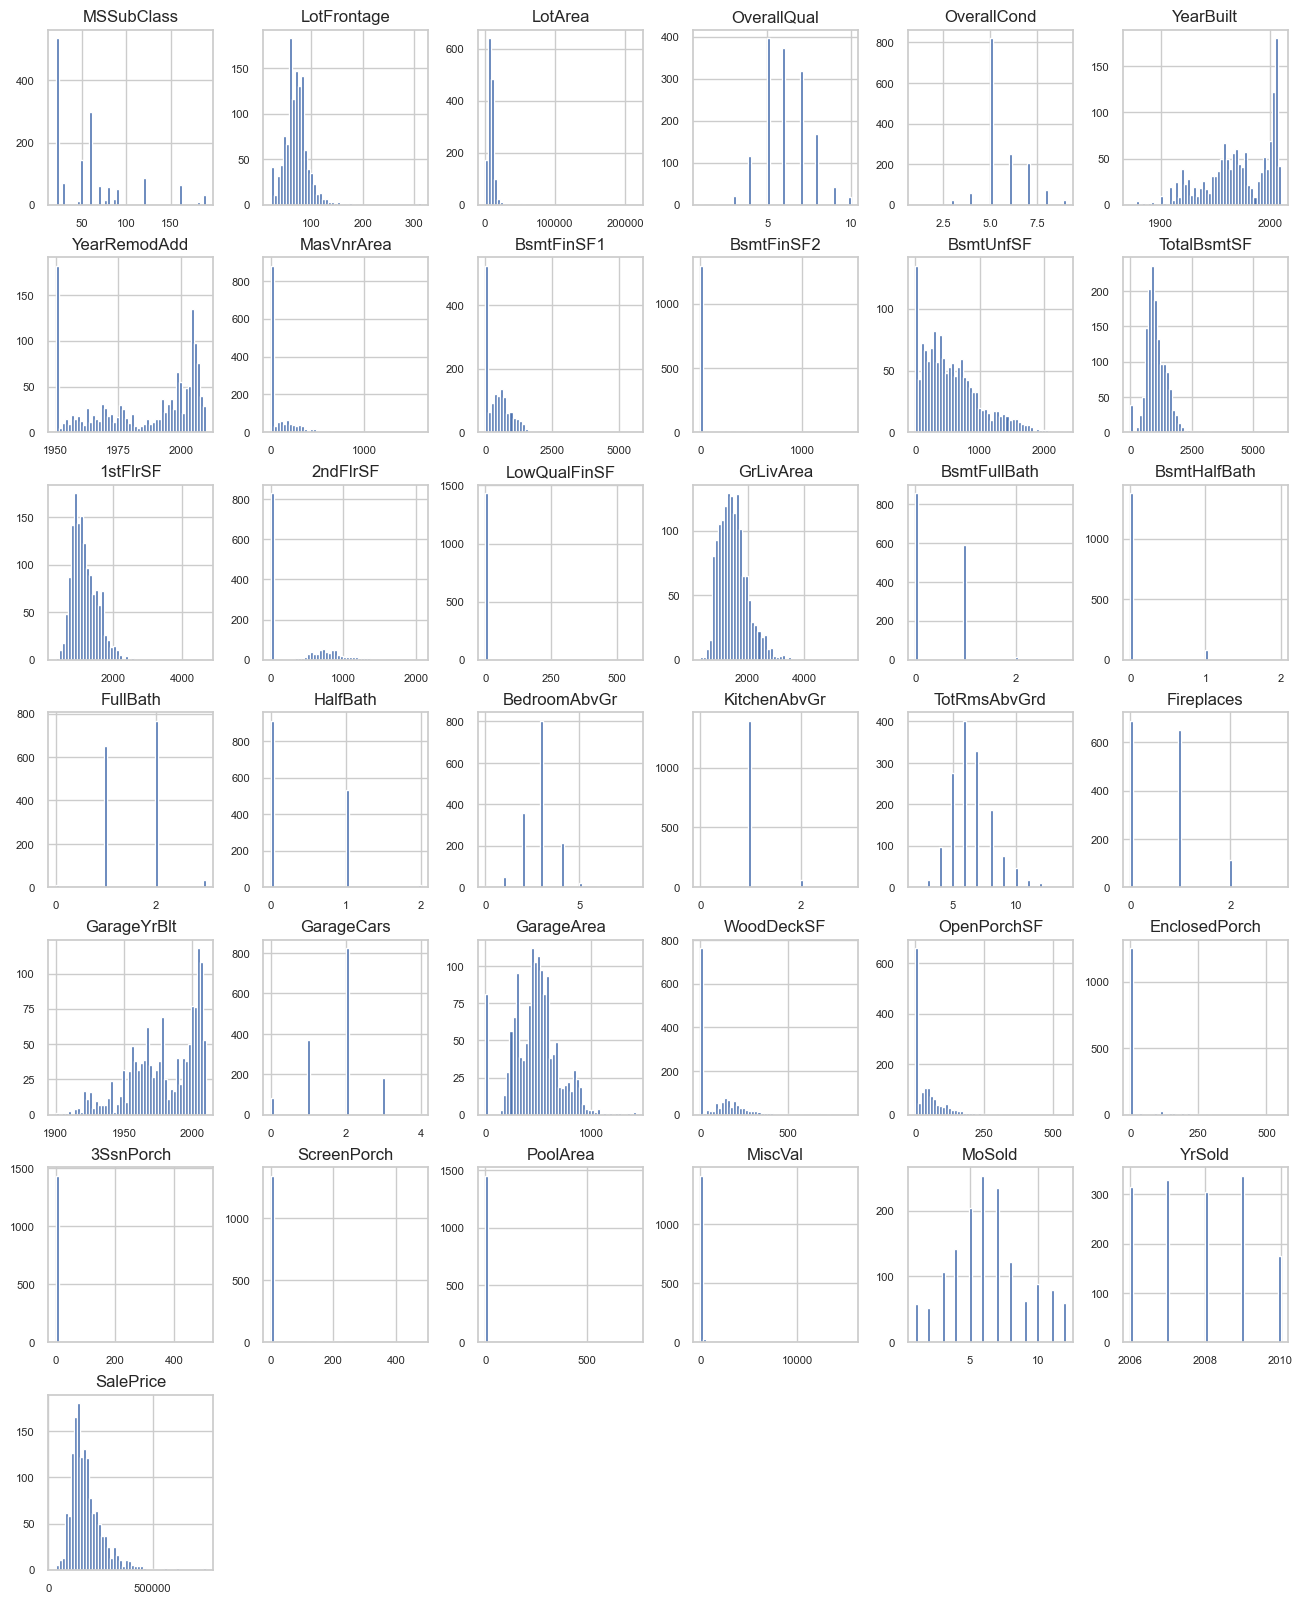

In [53]:
numeric_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np



In [71]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

numeric_data = df[numeric_cols]
categorical_data = df[categorical_cols]

num_imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = num_imputer.fit_transform(numeric_data)

cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_data_imputed = cat_imputer.fit_transform(categorical_data)

numeric_data_imputed = pd.DataFrame(numeric_data_imputed, columns=numeric_cols)
categorical_data_imputed = pd.DataFrame(categorical_data_imputed, columns=categorical_cols)

# Combine numeric and categorical data back into one DataFrame
df_imputed = pd.concat([numeric_data_imputed, categorical_data_imputed], axis=1)

In [72]:
df_encoded = pd.get_dummies(df_imputed, columns=categorical_cols)

In [73]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
predictions = rf.predict(X_test)

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 17592.71962328767
Mean Squared Error (MSE): 862170689.2710427
Root Mean Squared Error (RMSE): 29362.743217741812


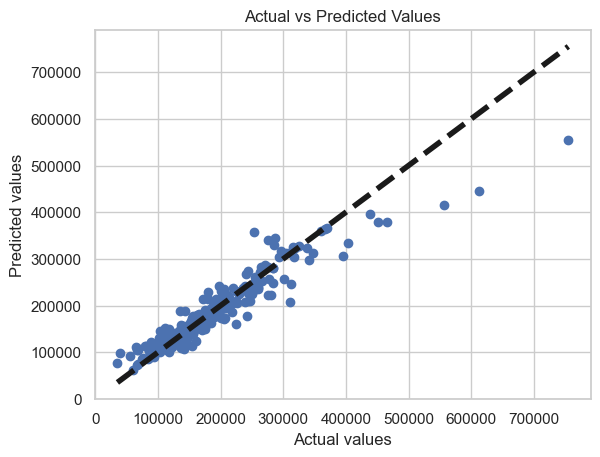

In [75]:
plt.scatter(y_test, predictions)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line
plt.show()

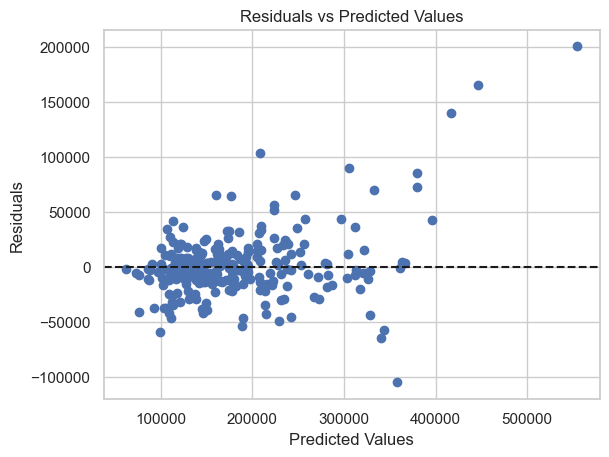

In [76]:
residuals = y_test - predictions

plt.scatter(predictions, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

In [1]:
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy visualization
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importances_df[0:10])

NameError: name 'rf' is not defined

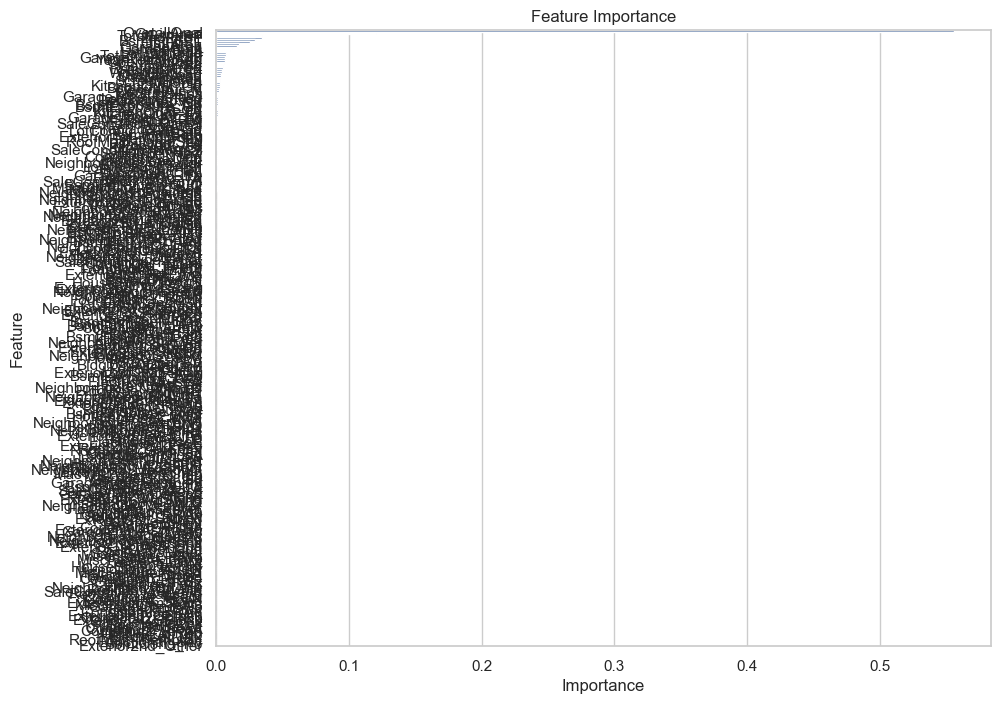

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importances_df)

# Display the plot
plt.title('Feature Importance')
plt.show()